In [85]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

DATASETS_DIR = "./Datasets/Flowers/"

classnames = []

for path in Path(DATASETS_DIR).iterdir():
    if path.is_dir():
        classnames.append(str(path).split("/")[-1])

print(classnames)

['sunflower', 'daisy', 'dandelion', 'tulip', 'rose', 'lotus']


In [86]:
X = []
y = []

for i in range(len(classnames)):
    print(classnames[i])
    images = list(Path(DATASETS_DIR + classnames[i]).glob("*"))
    for image in range(int(0.4 * len(images))):
        img = cv2.imread(str(images[image]))
        img = cv2.resize(img, (128, 128))
        img = img.astype("float32")
        img = img / 255
        X.append(img)
        y.append(i)

sunflower
daisy
dandelion
tulip
rose
lotus


In [87]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1395, 128, 128, 3)
(349, 128, 128, 3)
(1395, 6)
(349, 6)


[0. 0. 1. 0. 0. 0.]


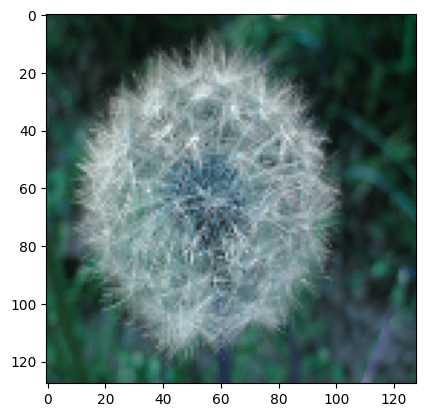

In [88]:
plt.imshow(X_train[2])
print(y_train[2])

In [89]:
from keras.models import Sequential, Model
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding="Same",
                 activation="relu", input_shape=X_train[0].shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="Same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=96, kernel_size=(3, 3), padding="Same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=96, kernel_size=(3, 3), padding="Same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dense(y_train.shape[1], activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
model.summary()

history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 96)        55392     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 96)      

In [90]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 2s 192ms/step - loss: 3.1779 - accuracy: 0.6017


[3.1778573989868164, 0.6017192006111145]

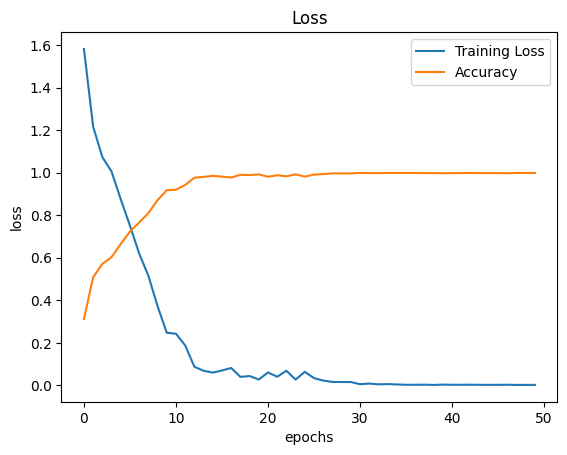

In [91]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["accuracy"], label="Accuracy")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

(128, 128, 3)
1/1 [==============================] - 0s 38ms/step
Predict: rose
True Label: rose


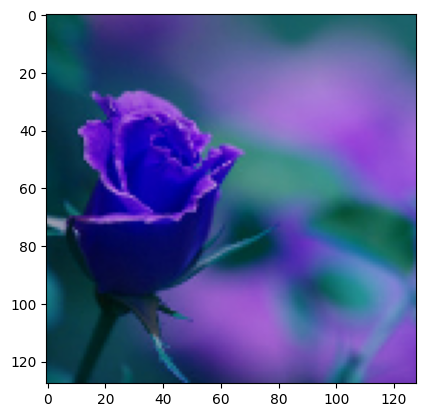

In [102]:
n = 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 38ms/step
Predict: rose
True Label: rose


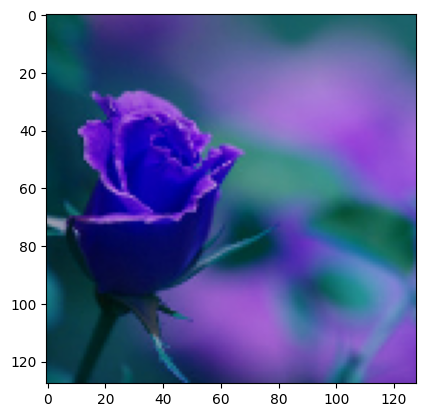

In [ ]:
n = 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 38ms/step
Predict: tulip
True Label: tulip


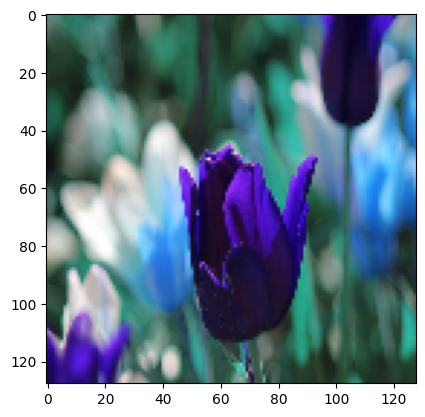

In [105]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 39ms/step
Predict: dandelion
True Label: dandelion


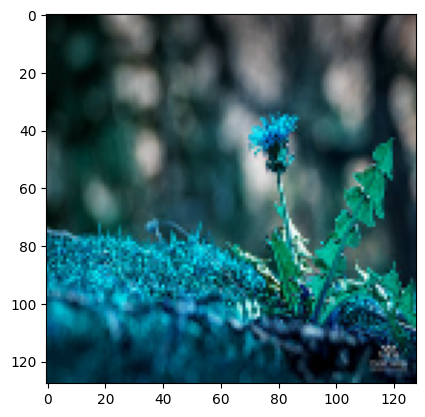

In [114]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 38ms/step
Predict: rose
True Label: rose


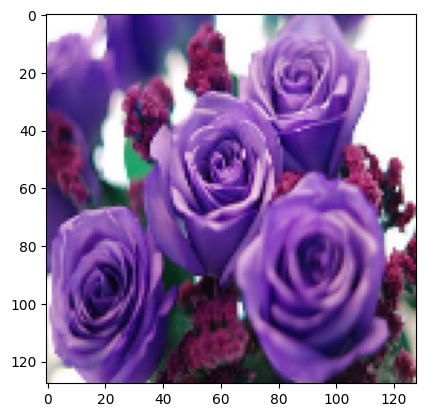

In [115]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 31ms/step
Predict: tulip
True Label: tulip


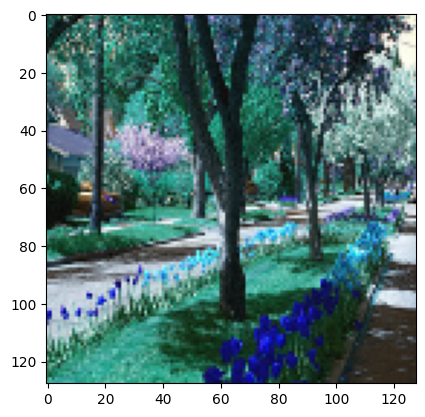

In [116]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 28ms/step
Predict: dandelion
True Label: rose


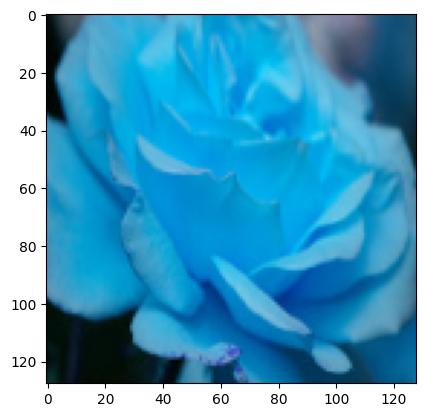

In [109]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 28ms/step
Predict: tulip
True Label: tulip


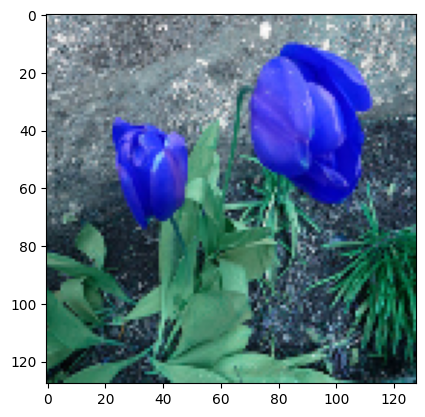

In [110]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 31ms/step
Predict: sunflower
True Label: sunflower


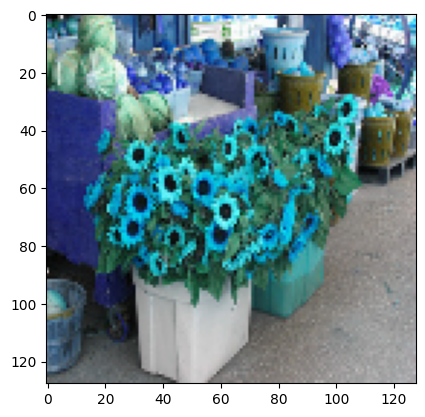

In [118]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 36ms/step
Predict: sunflower
True Label: sunflower


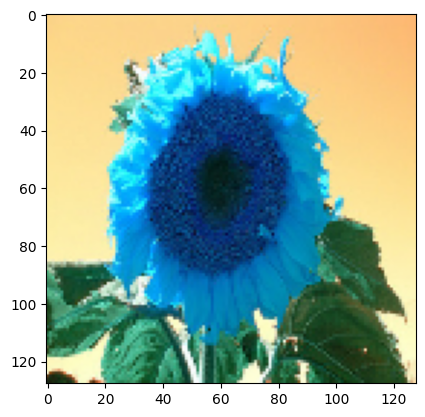

In [112]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 26ms/step
Predict: tulip
True Label: tulip


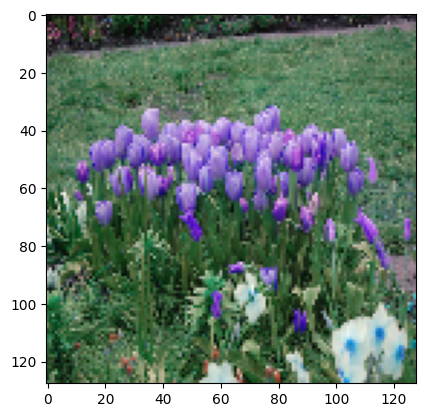

In [120]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])